<a href="https://colab.research.google.com/github/LukeZingg/MAT421/blob/main/Module_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python is a powerful tool for computing limits, a fundamental concept in calculus that describes the behavior of a function as it approaches a particular point. With libraries like SymPy, Python can symbolically evaluate limits, making it useful for both analytical and numerical approaches.

In [ ]:
import sympy as sp

# Define the variable
x = sp.symbols('x')

# Define a function
f1 = (x**2 - 1) / (x - 1)

# Evaluate the limit as x approaches 1
limit_value1 = sp.limit(f1, x, 1)

print(f"The limit of (x^2 - 1) / (x - 1) as x approaches 1 is: {limit_value1}")

# Repeat this process for more examples:
f2 = sp.sin(x)/x

limit_value2 = sp.limit(f2, x, 0)

print(f"The limit of sin(x)/x as x approaches 0 is: {limit_value2}")

f3 = 3*x**2 + 2*x - 5

limit_value3 = sp.limit(f3, x, 3)

print(f"The limit of 3x^2+2x-5 as x approaches 3 is: {limit_value3}")

The limit of (x^2 - 1) / (x - 1) as x approaches 1 is: 2
The limit of sin(x)/x as x approaches 0 is: 1
The limit of 3x^2+2x-5 as x approaches 3 is: 28


Similarly, Python can be used to find the derivative of functions, as seen below.

In [ ]:
# Compute the derivative of our previous three functions
df1 = sp.diff(f1, x)

print(f"The derivative of (x^2 - 1) / (x - 1) is: {df1}")

df2 = sp.diff(f2, x)

print(f"The derivative of sin(x)/x is: {df2}")

df3 = sp.diff(f3, x)

print(f"The derivative of 3x^2 + 2x - 5 is: {df3}")

The derivative of (x^2 - 1) / (x - 1) is: 2*x/(x - 1) - (x**2 - 1)/(x - 1)**2
The derivative of sin(x)/x is: cos(x)/x - sin(x)/x**2
The derivative of 3x^2 + 2x - 5 is: 6*x + 2


We can of course, use a similar method to evaluate the derivative of a function at some specified point:

In [ ]:
# Evaluate the derivative at x = 2
derivative_value1 = df1.subs(x, 2)

print(f"The derivative of (x^2 - 1) / (x - 1) at x = 2 is: {derivative_value1}")

# Evaluate the derivative at x = 1
derivative_value2 = df2.subs(x, 1)

print(f"The derivative of sin(x)/x at x = 1 is: {derivative_value2}")

# Evaluate the derivative at x = 3
derivative_value3 = df3.subs(x, 3)

print(f"The derivative of 3x^2 + 2x - 5 at x = 3 is: {derivative_value3}")

The derivative of (x^2 - 1) / (x - 1) at x = 2 is: 1
The derivative of sin(x)/x at x = 1 is: -sin(1) + cos(1)
The derivative of 3x^2 + 2x - 5 at x = 3 is: 20


For scenarios where we may not understand a function as a whole, but only have data at certain values or where differentiation is difficult, we can use fininte difference approximation to approximate the derivative of a function. This can be done in Python very effectively, taking advantage of Taylor's theorem.

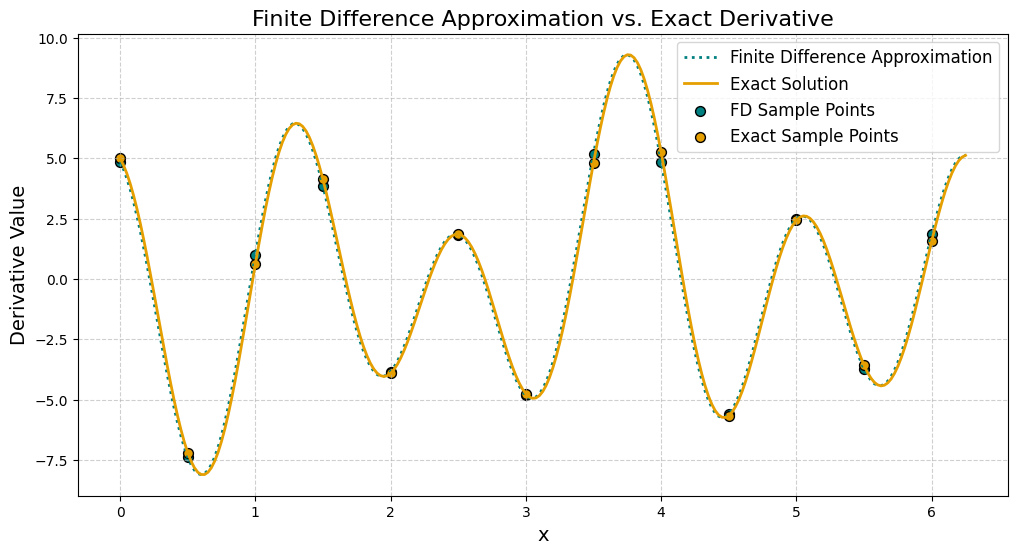

Max Error: 0.422258


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.025

# Define grid
x = np.arange(0, 2*np.pi, h)

# Create our function
def f(x):
    return np.sin(5*x) + np.cos(3*x) - np.sin(x**2 / 5)

y = f(x)

forward_diff = np.diff(y) / h

x_diff = x[:-1]

# Compute exact derivative solution
def df_exact(x):
    return 5*np.cos(5*x) - 3*np.sin(3*x) - (2*x/5) * np.cos(x**2 / 5)

exact_solution = df_exact(x_diff)

# Plot the solutions
plt.figure(figsize=(12, 6))
plt.plot(x_diff, forward_diff, linestyle='dotted', color="#008080", linewidth=2, label='Finite Difference Approximation')
plt.plot(x_diff, exact_solution, linestyle='solid', color="#E69F00", linewidth=2, label='Exact Solution')

# Enhancements: Mark points, labels, and styling
plt.scatter(x_diff[::20], forward_diff[::20], color="#008080", edgecolors='black', s=50, label='FD Sample Points')
plt.scatter(x_diff[::20], exact_solution[::20], color="#E69F00", edgecolors='black', s=50, label='Exact Sample Points')

# Labels and Title
plt.xlabel("x", fontsize=14)
plt.ylabel("Derivative Value", fontsize=14)
plt.title("Finite Difference Approximation vs. Exact Derivative", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()

# Compute max error between numerical derivative and exact solution
max_error = np.max(np.abs(exact_solution - forward_diff))
print(f"Max Error: {max_error:.6f}")

Further, we can visualize mutliple derivatives of a function, seeing how these change with each further level of differentiation.

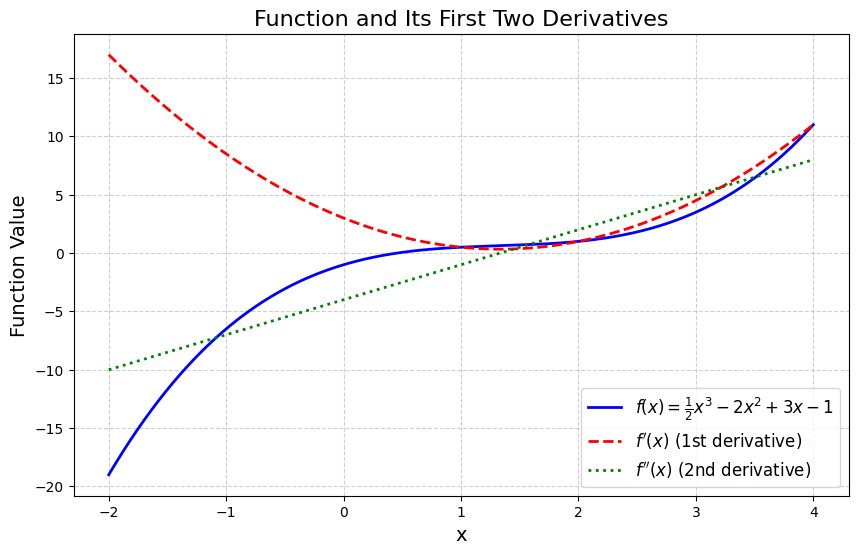

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define the symbolic variable
x = sp.Symbol('x')

# Define the function
f = (1/2) * x**3 - 2*x**2 + 3*x - 1

# Compute derivatives
df1 = sp.diff(f, x)
df2 = sp.diff(df1, x)

f_func = sp.lambdify(x, f, 'numpy')
df1_func = sp.lambdify(x, df1, 'numpy')
df2_func = sp.lambdify(x, df2, 'numpy')

# Define range for plotting
x_vals = np.linspace(-2, 4, 400)

# Compute function values
y_vals = f_func(x_vals)
y_df1_vals = df1_func(x_vals)
y_df2_vals = df2_func(x_vals)

colors = ['blue', 'red', 'green']
linestyles = ['solid', 'dashed', 'dotted']
labels = [
    r"$f(x) = \frac{1}{2}x^3 - 2x^2 + 3x - 1$",
    r"$f'(x)$ (1st derivative)",
    r"$f''(x)$ (2nd derivative)"
]

# Plot the function and its derivatives
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, color=colors[0], linestyle=linestyles[0], linewidth=2, label=labels[0])
plt.plot(x_vals, y_df1_vals, color=colors[1], linestyle=linestyles[1], linewidth=2, label=labels[1])
plt.plot(x_vals, y_df2_vals, color=colors[2], linestyle=linestyles[2], linewidth=2, label=labels[2])

# Labels and title
plt.xlabel("x", fontsize=14)
plt.ylabel("Function Value", fontsize=14)
plt.title("Function and Its First Two Derivatives", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

Finally, using calculus, we can find the local maxima and minima of functions. Python can utilize this property to find these points. We'll take advantage of this through plotting a function with it's local minima and maxima marked.

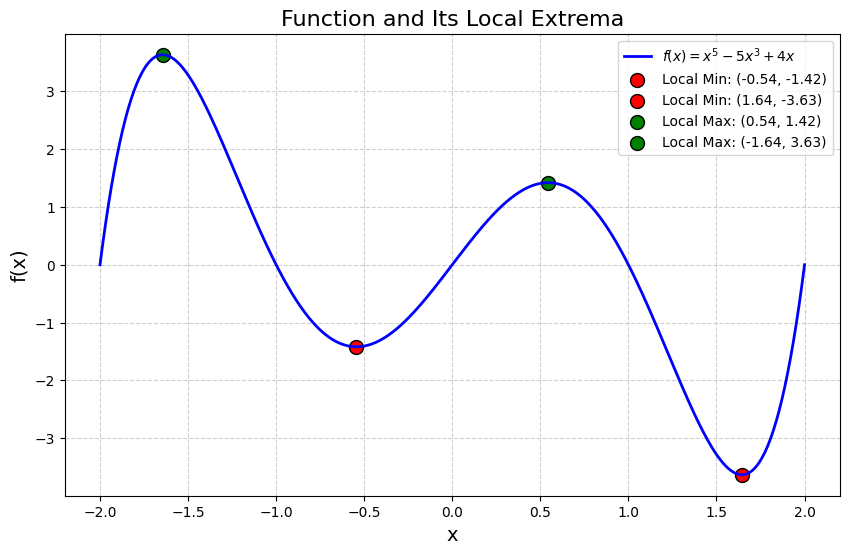

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbolic variable
x = sp.Symbol('x')

# Define the function
f = x**5 - 5*x**3 + 4*x

# Compute first derivative to find critical points
df = sp.diff(f, x)

# Solve df/dx = 0 to find critical points
critical_points = sp.solve(df, x)
critical_points = [p.evalf() for p in critical_points if p.is_real]  # Get only real solutions

# Compute second derivative
d2f = sp.diff(df, x)

# Classify critical points using second derivative test
local_maxima = []
local_minima = []

for p in critical_points:
    second_derivative_at_p = d2f.subs(x, p).evalf()
    if second_derivative_at_p < 0:  # Concave down → Local Max
        local_maxima.append((p, f.subs(x, p).evalf()))
    elif second_derivative_at_p > 0:  # Concave up → Local Min
        local_minima.append((p, f.subs(x, p).evalf()))

# Convert function to numerical for plotting
f_func = sp.lambdify(x, f, 'numpy')

# Define x range for plotting
x_vals = np.linspace(-2, 2, 500)
y_vals = f_func(x_vals)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, color='blue', linewidth=2, label=r'$f(x) = x^5 - 5x^3 + 4x$')

# Plot local minima (red points)
for x_min, y_min in local_minima:
    plt.scatter(x_min, y_min, color='red', edgecolors='black', s=100, label=f'Local Min: ({x_min:.2f}, {y_min:.2f})')

# Plot local maxima (green points)
for x_max, y_max in local_maxima:
    plt.scatter(x_max, y_max, color='green', edgecolors='black', s=100, label=f'Local Max: ({x_max:.2f}, {y_max:.2f})')

# Labels and title
plt.xlabel("x", fontsize=14)
plt.ylabel("f(x)", fontsize=14)
plt.title("Function and Its Local Extrema", fontsize=16)
plt.legend(fontsize=10, loc="upper right")
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()